In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

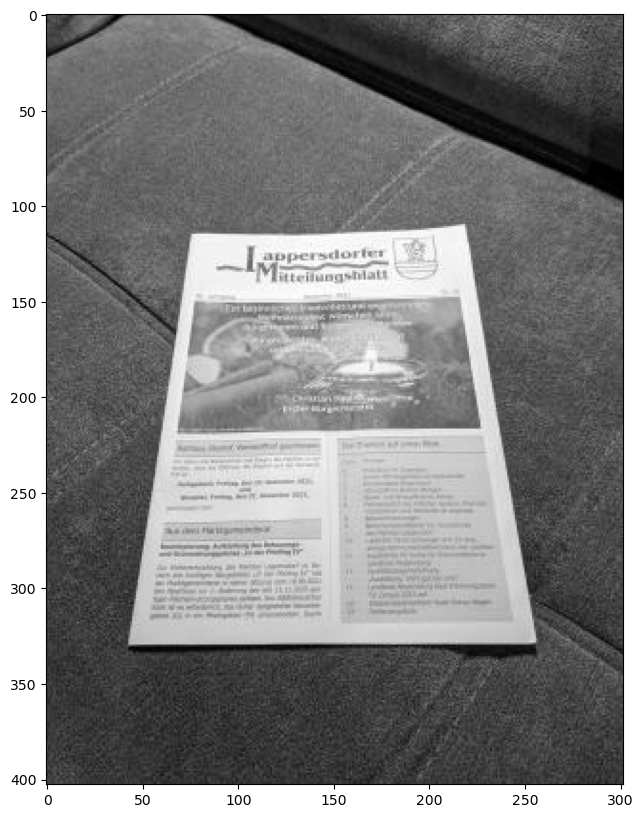

In [2]:
img = cv2.imread('desktop/desktop/document.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

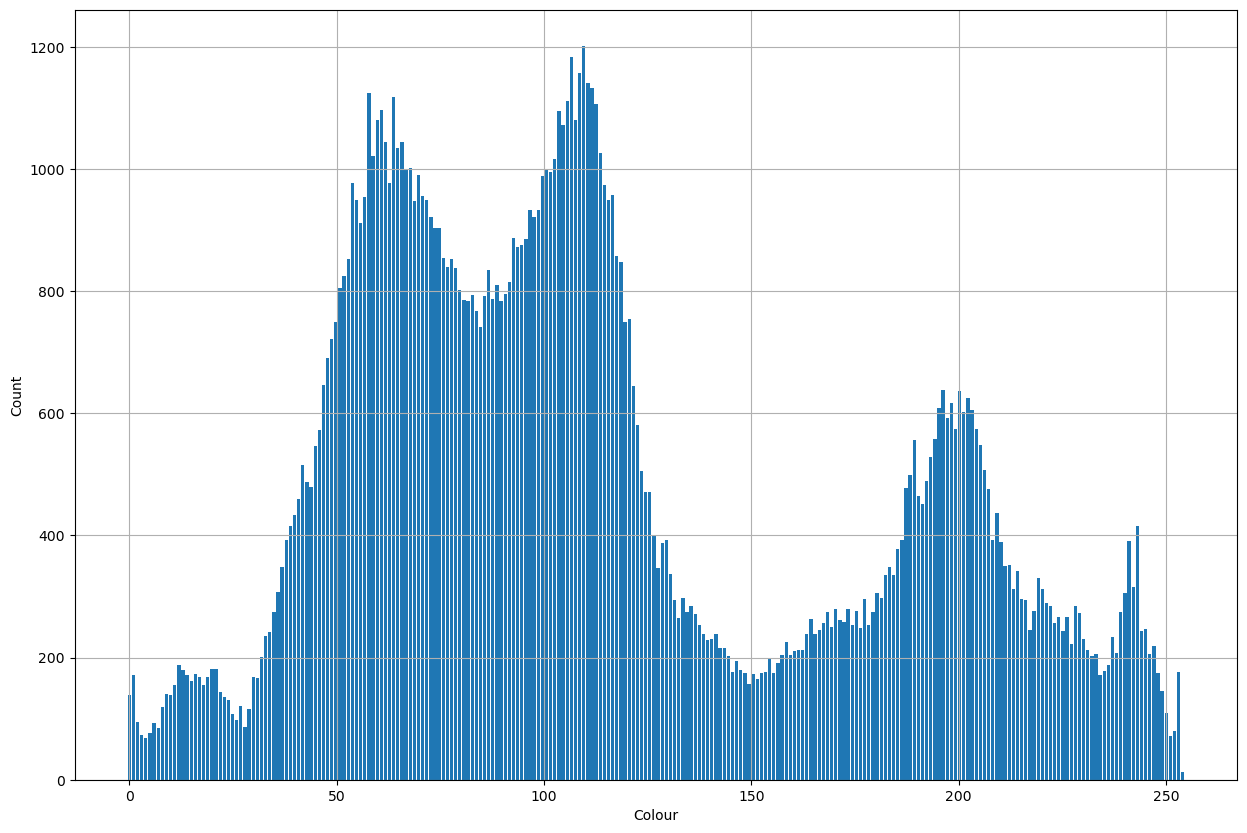

In [3]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

In [4]:
# Get image dimensions
rows, cols = img.shape
# Compute the total amount of image pixels
num_pixels = rows * cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the background
    foreground = img [img > th]
    # Extract the image pixels corresponding to the background
    background = img [img <= th]
    
    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue
    
    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground) / num_pixels
    omega_b = len(background) / num_pixels
    
    # Compute pixel variance for foreground and background
    # Hint: Check out the var function from numpy ;-)
    # https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)
    
    # Compute the within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b
    
    # Perform the optimization
    if wcv < best_wcv:
        best = wcv
        opt_th = th
        
# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold', opt_th)

Optimal threshold 254


(<Axes: >, <matplotlib.image.AxesImage at 0x1e2efe83fd0>)

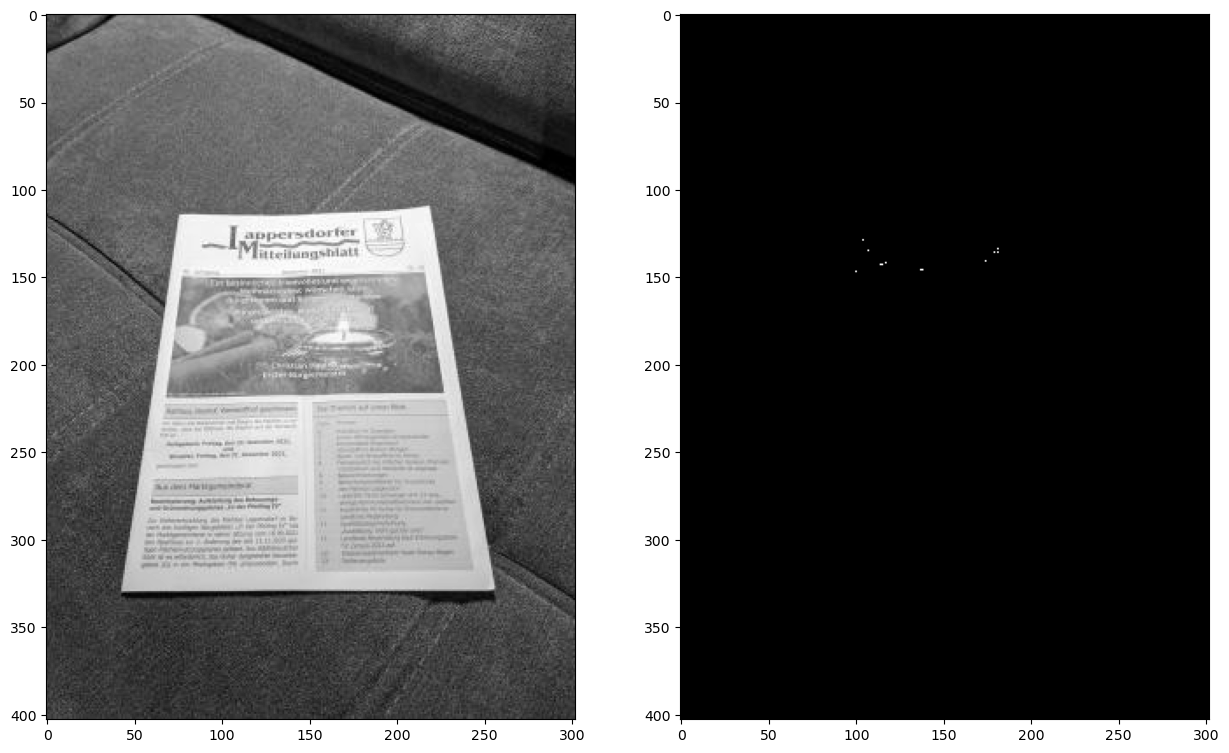

In [5]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(img > opt_th, cmap='gray')

In [ ]:
                            #QUESTIONS

Looking at the computed histogram, could it be considered bimodal?
Да, бимодальная гистограмма имеет два вида пикетов, которые подтверждают два основных класса пикселей и изображений. 
В этом случае первый пик отображает темный цвет фона, а другой пик показывает светлый цвет текста.

Looking at the computed histogram, what binarization threshold would you chose? Why?
Я бы выбрала диапазон около 130, поскольку в таком случае можно найти большее разнообразие между фоновыми и текстовыми пикселями

Looking at the resulting (thresholded) image, is the text binarization (detection) good?
Нет, полагаю за счет шума который присутствует на изображении